In this notebook we visually check the structure of the connectomes where we have added reciprocal connections in two ways:

* Along maximal simplices of the E-E circuit
* At random on the whole E-E circuit

The controls where generated in **`data_analysis/activity/computations/add_rc_manipulations.py`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data 
root="/gpfs/bbp.cscs.ch/home/egassant/reliability_and_structure/data_analysis/data/"
sc={}
sc["structured"]=pd.read_pickle(f"{root}BBPsc_rc_on_simplices.pkl")
sc["controls"]=pd.read_pickle(f"{root}BBPsc_rc_on_simplices_controls.pkl")
seeds=np.arange(10)

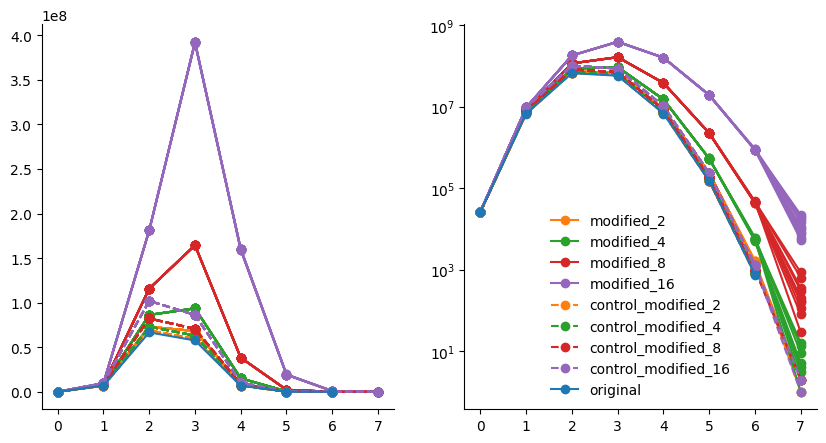

In [3]:
# Plotting all individual curves 
fig, axs = plt.subplots(1, 2, figsize=(10,5))

for i in range(2):
    for mtype in sc.keys():
        for r, key in enumerate(sc[mtype].keys()):
            if key!='original':
                for l, seed in enumerate(sc[mtype][key].keys()):
                    if l==0 and mtype=="structured":
                        label=key
                        linestyle=None
                    elif l==0 and mtype=="controls":
                        label=f'control_{key}'
                        linestyle="dashed"
                    else:
                        label=None
                    axs[i].plot(sc[mtype][key][seed].index, sc[mtype][key][seed].values, label=label, 
                             marker='o', color=f"C{r}", linestyle=linestyle)
    key="original"
    axs[i].plot(range(len(sc["structured"][key])), sc["structured"][key], label=key, color=f"C{0}", marker="o")
    axs[i].spines[["top", "right"]].set_visible(False)
axs[1].set_yscale('log')
axs[1].legend(frameon=False)


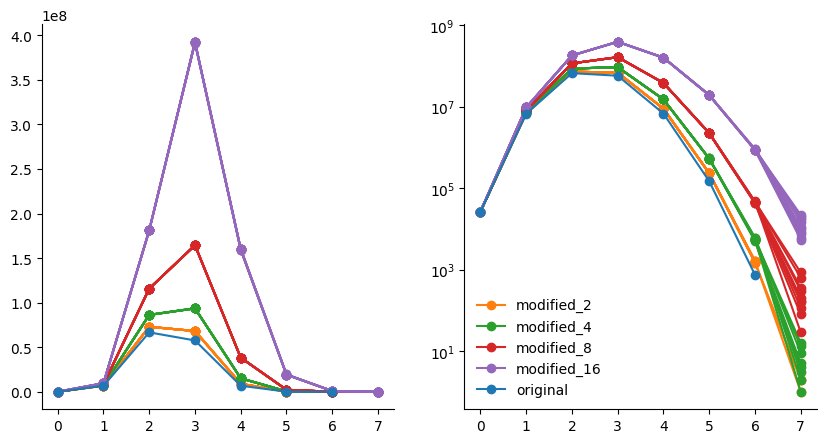

In [4]:
# Plotting only structured 
fig, axs = plt.subplots(1, 2, figsize=(10,5))

for i in range(2):
    for mtype in ["structured"]:
        for r, key in enumerate(sc[mtype].keys()):
            if key!='original':
                for l, seed in enumerate(sc[mtype][key].keys()):
                    if l==0 and mtype=="structured":
                        label=key
                        linestyle=None
                    elif l==0 and mtype=="controls":
                        label=f'control_{key}'
                        linestyle="dashed"
                    else:
                        label=None
                    axs[i].plot(sc[mtype][key][seed].index, sc[mtype][key][seed].values, label=label, 
                             marker='o', color=f"C{r}", linestyle=linestyle)
    key="original"
    axs[i].plot(range(len(sc["structured"][key])), sc["structured"][key], label=key, color=f"C{0}", marker="o")
    axs[i].spines[["top", "right"]].set_visible(False)
axs[1].set_yscale('log')
axs[1].legend(frameon=False)

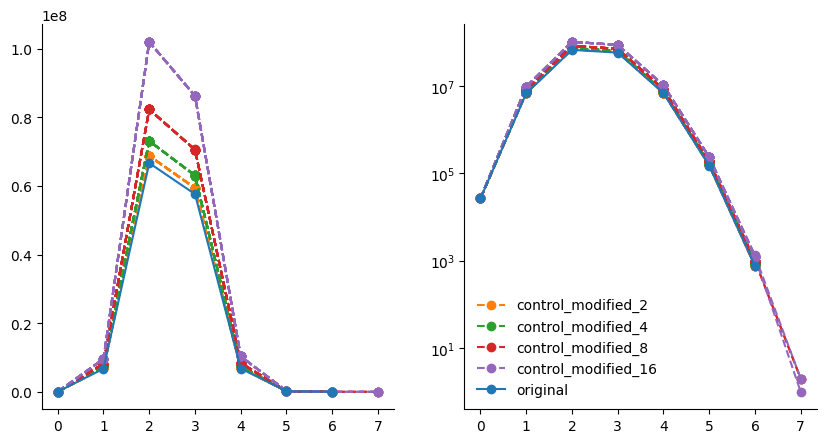

In [5]:
# Plotting only controls 
fig, axs = plt.subplots(1, 2, figsize=(10,5))

for i in range(2):
    for mtype in ["controls"]:
        for r, key in enumerate(sc[mtype].keys()):
            if key!='original':
                for l, seed in enumerate(sc[mtype][key].keys()):
                    if l==0 and mtype=="structured":
                        label=key
                        linestyle=None
                    elif l==0 and mtype=="controls":
                        label=f'control_{key}'
                        linestyle="dashed"
                    else:
                        label=None
                    axs[i].plot(sc[mtype][key][seed].index, sc[mtype][key][seed].values, label=label, 
                             marker='o', color=f"C{r}", linestyle=linestyle)
    key="original"
    axs[i].plot(range(len(sc["structured"][key])), sc["structured"][key], label=key, color=f"C{0}", marker="o")
    axs[i].spines[["top", "right"]].set_visible(False)
axs[1].set_yscale('log')
axs[1].legend(frameon=False)


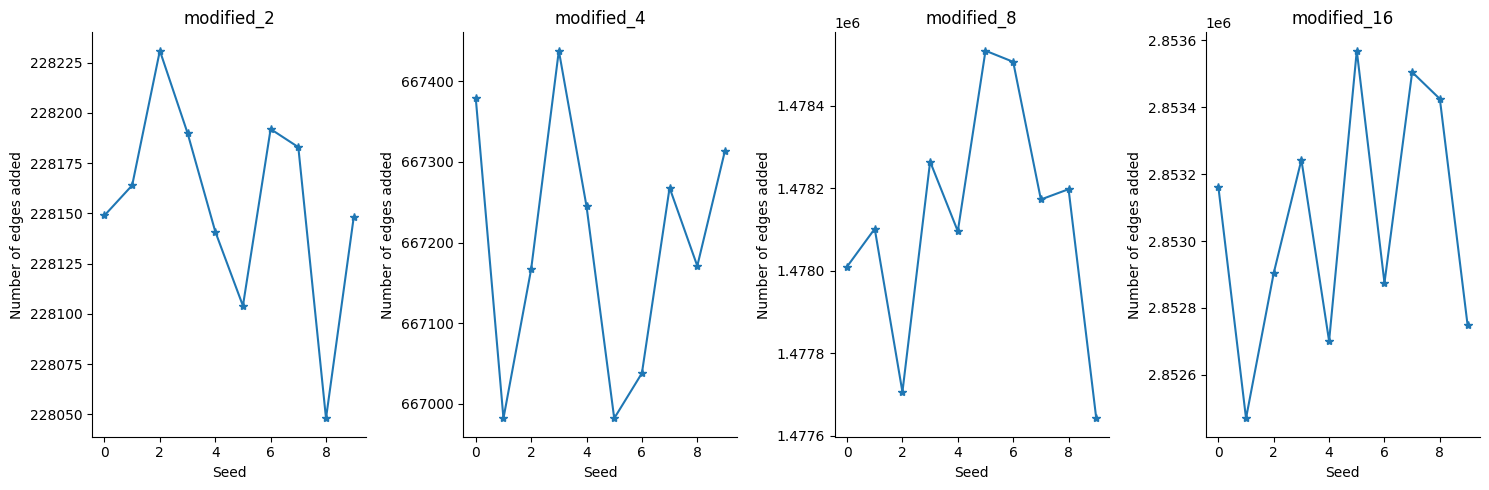

In [6]:
# Plotting number of edges added 
fig, axs = plt.subplots(1,4, figsize=(15,5))
baseline=sc["structured"]['original'][1]
for k, blowup in enumerate(sc["controls"].keys()-["original"]):
    df=pd.DataFrame.from_dict(sc["controls"][f'{blowup}'])
    axs[k].plot(seeds, df.loc[1]-baseline, marker="*", label=f"{blowup}")
    axs[k].set_xlabel("Seed")
    axs[k].set_ylabel("Number of edges added")
    axs[k].spines[["top", "right"]].set_visible(False)
    axs[k].set_title(f"{blowup}")
plt.tight_layout()

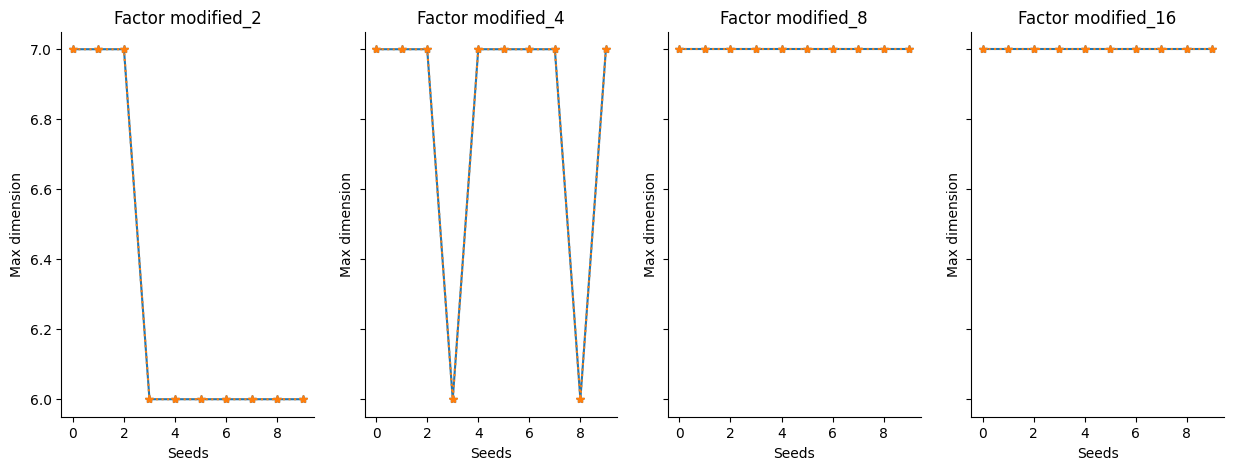

In [7]:
# Plotting maximal dimension 
fig, axs = plt.subplots(1,4,figsize=(15,5), sharey=True)
for k, blowup in enumerate(sc["controls"].keys()-["original"]):
    max_dim={"structured":[], "controls":[]}
    for mtype in max_dim.keys():
        for seed in seeds: 
            max_dim[mtype].append(sc[mtype][f'{blowup}'][seed].index.stop-1)
    axs[k].plot(seeds, max_dim["structured"], marker="*", label=f"structured_{blowup}")
    axs[k].plot(seeds, max_dim["structured"], marker="*", label=f"control_{blowup}", linestyle='dotted')
    axs[k].spines[["top", "right"]].set_visible(False)
    axs[k].set_xlabel("Seeds")
    axs[k].set_ylabel("Max dimension")
    axs[k].set_title(f"Factor {blowup}")
    
